# Chapter 2 Data Preprocessing

Data preprocessing is a process of preparing the raw data and making it suitable for a predictive models and machine learning. It is the first and crucial step for predictive/machine learning model.

a. It is mandatory to clean it and put in a formatted way.

b. Missing Values

c. Normalization / Scaling (numeric transformations)

Independent variable, predictor, features

MinMaxScaler scales the data so that each feature is in the range [0, 1]. It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.

d. Dummy Variables (convert categorical features into numerical ones)

Automatic feature selection Feature engineering (e.g. binning, polynomial features,..)
Handling missing data Handling non-normality:
power, box-cox transformation Dimensionality reduction (e.g. PCA) Learned embeddings (e.g. for text)

3.1.2. Data Transformations for Individual Predictors 3.1.3. Data Transformations for Multiple Predictors 3.1.4. DealingwithMissingValues 3.1.5. Removing Predictors 3.1.6. Adding
Predictors 3.1.7. Binning Predictors 3.1.8. Computing

In [2]:
# data preprocessing dataset
# Case study : Cell segmentation in high-content screening
library("AppliedPredictiveModeling")
data(segmentationOriginal)

# To see the variables
str(segmentationOriginal)

#Many variables

'data.frame':	2019 obs. of  119 variables:
 $ Cell                         : int  207827637 207932307 207932463 207932470 207932455 207827656 207827659 207827661 207932479 207932480 ...
 $ Case                         : Factor w/ 2 levels "Test","Train": 1 2 2 2 1 1 1 1 1 1 ...
 $ Class                        : Factor w/ 2 levels "PS","WS": 1 1 2 1 1 2 2 1 2 2 ...
 $ AngleCh1                     : num  143.25 133.75 106.65 69.15 2.89 ...
 $ AngleStatusCh1               : int  1 0 0 0 2 2 1 1 2 1 ...
 $ AreaCh1                      : int  185 819 431 298 285 172 177 251 495 384 ...
 $ AreaStatusCh1                : int  0 1 0 0 0 0 0 0 0 0 ...
 $ AvgIntenCh1                  : num  15.7 31.9 28 19.5 24.3 ...
 $ AvgIntenCh2                  : num  3.95 205.88 115.32 101.29 111.42 ...
 $ AvgIntenCh3                  : num  9.55 69.92 63.94 28.22 20.47 ...
 $ AvgIntenCh4                  : num  2.21 164.15 106.7 31.03 40.58 ...
 $ AvgIntenStatusCh1            : int  0 0 0 0 0 1 1 0 0 0 ...

In [3]:
# Data Transformations for Indiviual Predictors
# Histogram
# Mean, variance, 
# Skewness, kurtosis 

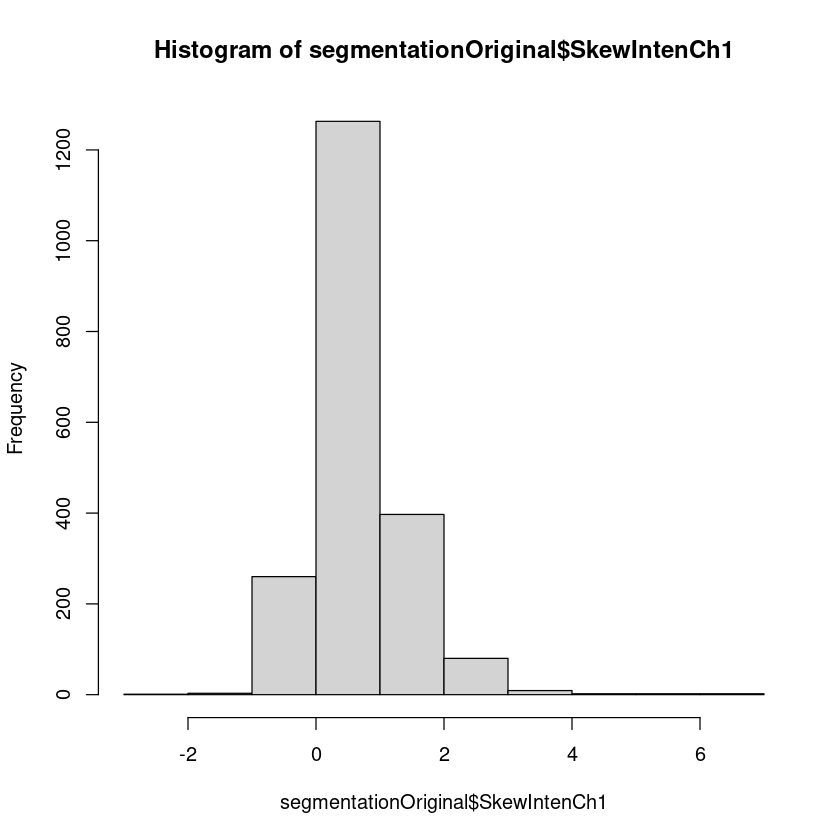

In [4]:
hist(segmentationOriginal$SkewIntenCh1)

The sample skewness = 

$$
         \frac{\sum (x_i- \bar {x})^3} {n s^3}
$$


If the sample skewness is close to zero, maybe the data are symmetrical.

If the sample skewness is much bigger than zero, the data are postively skewed/skewed to the right.

If the sample skewness is much below than zero, the data are negatively skewed/skewed to the left.



In [5]:
#Self defined function in R:
#To find the skewness of a variable x
   skewfun = function(x)

{
    xbar = mean(x)
    s=sd(x)
    n=length(x)
    sk=sum(x-xbar)^3/(n*s^3)
    return(sk)
    
}

#To find the skewness of SkewIntenCh1 using skewfun 
round(skewfun(segmentationOriginal$SkewIntenCh1),2)

#To find the skewness of Neigh
round(skewfun(segmentationOriginal$NeighborAvgDistCh1),2)

#use skewness calculation in package "e1071"

library(e1071)

#more reliable
skewness(segmentationOriginal$SkewIntenCh1)

#R apply function
?apply

#Example : to calculate the skewness of the 3rd to 50th quantitative variables in the data

#The 3rd quantitive variable is at the 9th column, 
# segmentationOriginal[,9:50] data matrix

#2 : for a column

apply(segmentationOriginal[,9:50],2,skewness) # 1이냐 2냐는 행/열  1 : for row ,#2 : for column 


as.vector(round(apply(segmentationOriginal[,9:50],2,skewness),2))
?apply

round(apply(segmentationOriginal[,9:50],2,skewness),2)

[1] 0

[1] 0

[1] 1.542844

AvgIntenCh2                   AvgIntenCh3 
                   0.97769142                    2.71682974 
                  AvgIntenCh4             AvgIntenStatusCh1 
                   1.82474941                    1.52937848 
            AvgIntenStatusCh2             AvgIntenStatusCh3 
                   0.90590558                    3.01276804 
            AvgIntenStatusCh4        ConvexHullAreaRatioCh1 
                   2.22077336                    2.46192050 
 ConvexHullAreaRatioStatusCh1       ConvexHullPerimRatioCh1 
                   3.08907143                   -1.31387868 
ConvexHullPerimRatioStatusCh1           DiffIntenDensityCh1 
                   1.56909379                    2.66778149 
          DiffIntenDensityCh3           DiffIntenDensityCh4 
                   2.06717124                    1.81997087 
    DiffIntenDensityStatusCh1     DiffIntenDensityStatusCh3 
                   1.86864549                    1.44537894 
    DiffIntenDensityStatusCh4               EntropyIntenCh1 
                   1.57377555                    0.36556307 
              EntropyIntenCh3               EntropyIntenCh4 
                  -0.99902221                   -0.83210097 
        EntropyIntenStatusCh1         EntropyIntenStatusCh3 
                   0.73125237                    0.84143095 
        EntropyIntenStatusCh4                 EqCircDiamCh1 
                   1.10278084                    1.97636715 
          EqCircDiamStatusCh1               EqEllipseLWRCh1 
                   2.48969012                    2.56912800 
        EqEllipseLWRStatusCh1         EqEllipseOblateVolCh1 
                   2.50553220                    5.42783500 
  EqEllipseOblateVolStatusCh1        EqEllipseProlateVolCh1 
                   3.53030626                    5.39469639 
 EqEllipseProlateVolStatusCh1               EqSphereAreaCh1 
                   3.96579965                    3.36785942 
        EqSphereAreaStatusCh1                EqSphereVolCh1 
                   3.08804420                    5.30096883 
         EqSphereVolStatusCh1                FiberAlign2Ch3 
                   3.82036812                   -0.06488576 
               FiberAlign2Ch4          FiberAlign2StatusCh3 
                  -0.11586651                    1.03404665 
         FiberAlign2StatusCh4                FiberLengthCh1 
                   0.74635872                    2.29339150 
         FiberLengthStatusCh1                 FiberWidthCh1 
                   2.84791906                    0.98076311

[1]  0.98  2.72  1.82  1.53  0.91  3.01  2.22  2.46  3.09 -1.31  1.57  2.67
[13]  2.07  1.82  1.87  1.45  1.57  0.37 -1.00 -0.83  0.73  0.84  1.10  1.98
[25]  2.49  2.57  2.51  5.43  3.53  5.39  3.97  3.37  3.09  5.30  3.82 -0.06
[37] -0.12  1.03  0.75  2.29  2.85  0.98

AvgIntenCh2                   AvgIntenCh3 
                         0.98                          2.72 
                  AvgIntenCh4             AvgIntenStatusCh1 
                         1.82                          1.53 
            AvgIntenStatusCh2             AvgIntenStatusCh3 
                         0.91                          3.01 
            AvgIntenStatusCh4        ConvexHullAreaRatioCh1 
                         2.22                          2.46 
 ConvexHullAreaRatioStatusCh1       ConvexHullPerimRatioCh1 
                         3.09                         -1.31 
ConvexHullPerimRatioStatusCh1           DiffIntenDensityCh1 
                         1.57                          2.67 
          DiffIntenDensityCh3           DiffIntenDensityCh4 
                         2.07                          1.82 
    DiffIntenDensityStatusCh1     DiffIntenDensityStatusCh3 
                         1.87                          1.45 
    DiffIntenDensityStatusCh4               EntropyIntenCh1 
                         1.57                          0.37 
              EntropyIntenCh3               EntropyIntenCh4 
                        -1.00                         -0.83 
        EntropyIntenStatusCh1         EntropyIntenStatusCh3 
                         0.73                          0.84 
        EntropyIntenStatusCh4                 EqCircDiamCh1 
                         1.10                          1.98 
          EqCircDiamStatusCh1               EqEllipseLWRCh1 
                         2.49                          2.57 
        EqEllipseLWRStatusCh1         EqEllipseOblateVolCh1 
                         2.51                          5.43 
  EqEllipseOblateVolStatusCh1        EqEllipseProlateVolCh1 
                         3.53                          5.39 
 EqEllipseProlateVolStatusCh1               EqSphereAreaCh1 
                         3.97                          3.37 
        EqSphereAreaStatusCh1                EqSphereVolCh1 
                         3.09                          5.30 
         EqSphereVolStatusCh1                FiberAlign2Ch3 
                         3.82                         -0.06 
               FiberAlign2Ch4          FiberAlign2StatusCh3 
                        -0.12                          1.03 
         FiberAlign2StatusCh4                FiberLengthCh1 
                         0.75                          2.29 
         FiberLengthStatusCh1                 FiberWidthCh1 
                         2.85                          0.98

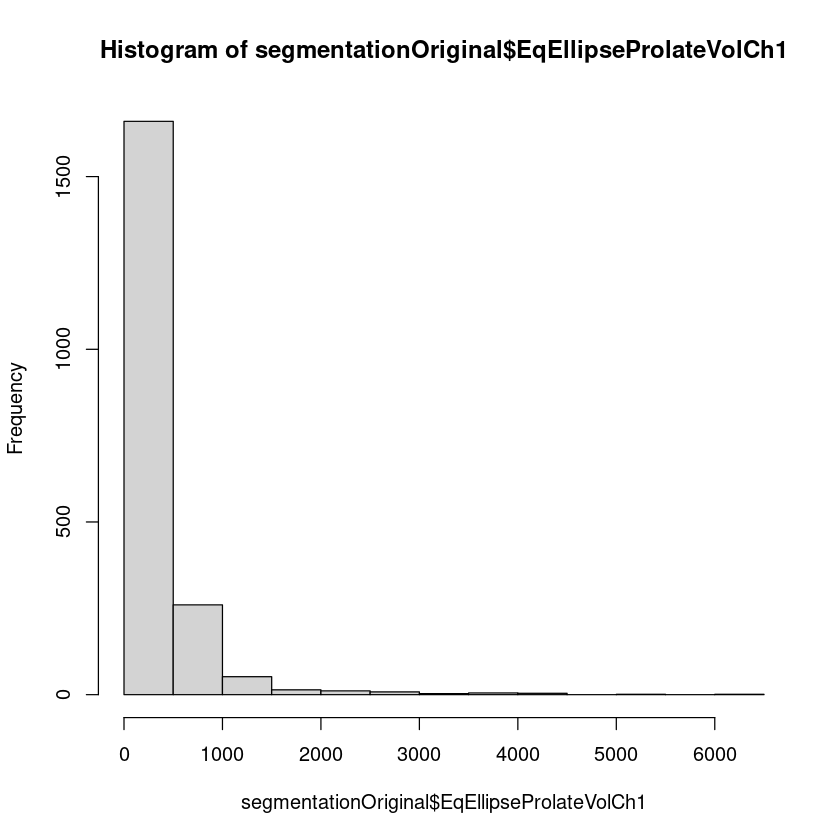

In [6]:
#Suppose that we identify some variables with a large skewness(highly skewed)
#for exmaple 
hist(segmentationOriginal$EqEllipseProlateVolCh1)

In [7]:
# How to fix it for the purpose of predictive modeling 
# Transformation on a single variable to fix "highly skewed" issue


# Power transformation 

Box-Cox transformation is a data science technique to transform a variable so that it resembles a normal distribution.

Plot the data/calculate the skewness to see if the distribution of variables

# Formula:

$$
Y = \left\{
\begin{array} {1}
{{
\frac{X ^ \lambda- 1 } \lambda
} \ \textrm{ for } \lambda \neq0, }\\
{ { \mathop{\rm log} } X \ \textrm { for  } \lambda = 0 }
\end {array}
\right.
$$


#package MASS

#package caret

[1] -0.4646465

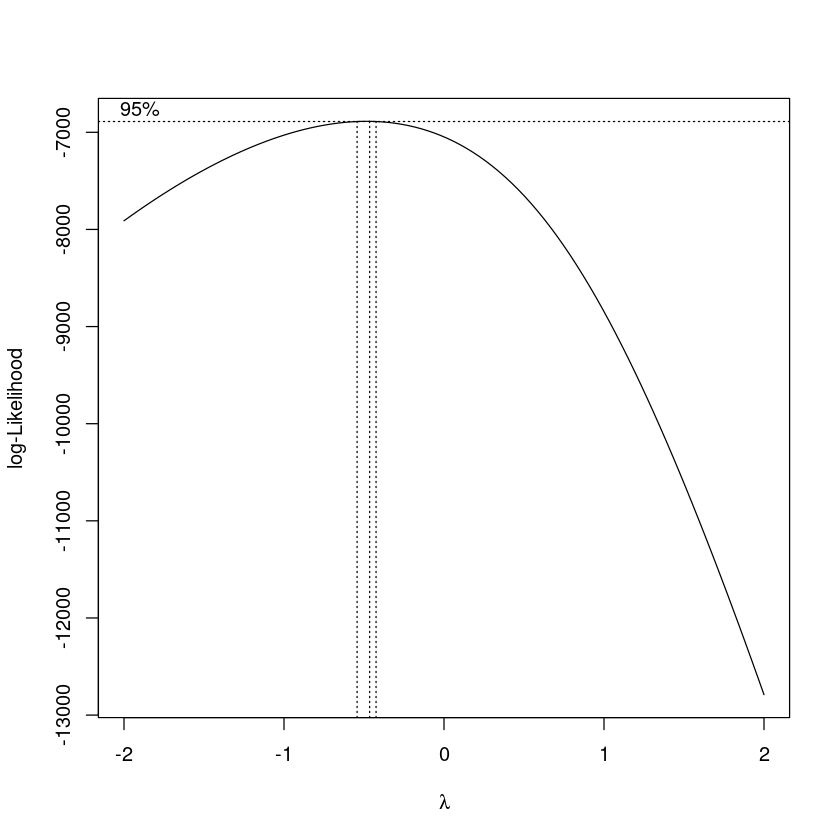

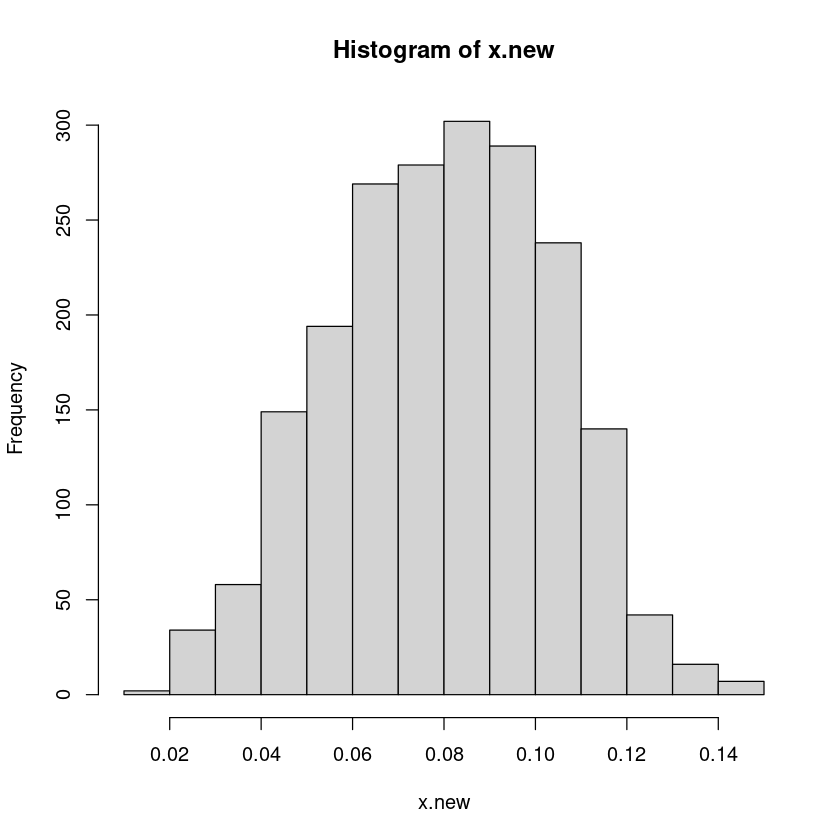

In [30]:
library(MASS)
#Run boxcox transformation
yval = segmentationOriginal$EqEllipseProlateVolCh1
out = boxcox(yval ~ 1)


#To get the lambda to max the likelihood function as in the plot
lambda = out$x[out$y==max(out$y)]
lambda


#The power transformation (without )
x.new = yval^(lambda)  # the box-cox transformation
hist(x.new)

In [1]:
out

ERROR: Error in eval(expr, envir, enclos): object 'out' not found


In [31]:
str(sdata)

'data.frame':	1009 obs. of  119 variables:
 $ Cell                         : int  207932307 207932463 207932470 207932484 207932459 207827779 207827784 207827645 208319730 208333252 ...
 $ Case                         : Factor w/ 2 levels "Test","Train": 2 2 2 2 2 2 2 2 2 2 ...
 $ Class                        : Factor w/ 2 levels "PS","WS": 1 2 1 2 1 1 1 2 2 2 ...
 $ AngleCh1                     : num  133.8 106.6 69.2 109.4 104.3 ...
 $ AngleStatusCh1               : int  0 0 0 0 0 0 2 0 0 0 ...
 $ AreaCh1                      : int  819 431 298 256 258 358 158 315 246 223 ...
 $ AreaStatusCh1                : int  1 0 0 0 0 0 0 0 0 0 ...
 $ AvgIntenCh1                  : num  31.9 28 19.5 18.8 17.6 ...
 $ AvgIntenCh2                  : num  206 115 101 126 124 ...
 $ AvgIntenCh3                  : num  69.9 63.9 28.2 13.6 22.5 ...
 $ AvgIntenCh4                  : num  164.2 106.7 31 46.8 71.2 ...
 $ AvgIntenStatusCh1            : int  0 0 0 0 0 0 0 1 1 1 ...
 $ AvgIntenStatusCh2    

In [47]:
#Subsetting the Data
#delete all Status variables
sdata = subset(segmentationOriginal, Case == "Train")                                  
                                    
#sdata = segmentationOriginal[segmentationOriginal$Case == "Train",]
#sdata= segmentationOriginal%>%filter(Case == "Train")
cellid = sdata$Cell
class = sdata$Class
case = sdata$Case
                   

In [49]:
#To delete the first three variables
segData = sdata[,-(1:3)]
                                    
                                    
#To select all variables such that the "Status" is in the name of the variable
statusColNum = grep("Status", names(segData))
                                    
#Keep all variables which are quantitative (no status variables)
segData = segData[,-statusColNum]
                                    
#The number of cases and the number of variables
length(segData[,1])
length(segData[1,])
str(segData)
                                    
                                    
#There are still 58 vaiables

[1] 1009

[1] 58

'data.frame':	1009 obs. of  58 variables:
 $ AngleCh1               : num  133.8 106.6 69.2 109.4 104.3 ...
 $ AreaCh1                : int  819 431 298 256 258 358 158 315 246 223 ...
 $ AvgIntenCh1            : num  31.9 28 19.5 18.8 17.6 ...
 $ AvgIntenCh2            : num  206 115 101 126 124 ...
 $ AvgIntenCh3            : num  69.9 63.9 28.2 13.6 22.5 ...
 $ AvgIntenCh4            : num  164.2 106.7 31 46.8 71.2 ...
 $ ConvexHullAreaRatioCh1 : num  1.26 1.05 1.2 1.08 1.08 ...
 $ ConvexHullPerimRatioCh1: num  0.797 0.935 0.866 0.92 0.931 ...
 $ DiffIntenDensityCh1    : num  31.9 32.5 26.7 28 27.9 ...
 $ DiffIntenDensityCh3    : num  43.1 36 22.9 14.9 16.1 ...
 $ DiffIntenDensityCh4    : num  79.3 51.4 26.4 32.7 36.2 ...
 $ EntropyIntenCh1        : num  6.09 5.88 5.42 5.38 5.18 ...
 $ EntropyIntenCh3        : num  6.64 6.68 5.44 4.15 5.49 ...
 $ EntropyIntenCh4        : num  7.88 7.14 5.78 6.19 6.62 ...
 $ EqCircDiamCh1          : num  32.3 23.4 19.5 18.1 18.2 ...
 $ EqEllipseLWRCh

# Find nearZero variance predictors

In [10]:
library(caret)
data(mdrr)
data.frame(table(mdrrDescr$nR11))
var(mdrrDescr$nR11)


#str(mdrrDescr)
nvz.dat=nearZeroVar(mdrrDescr, saveMetrics = TRUE)
#nvz.dat
sum(nvz.dat$nzv==TRUE)

mdrrDescr[1,nvz.dat$nzv==TRUE]

#The variable "mdrrDescr$nR11" is a nearZeroVar variable. Highly unbalanced.

Loading required package: ggplot2

Loading required package: lattice



Var1,Freq
<fct>,<int>
0,501
1,4
2,23


[1] 0.1731787

[1] 45

,nTB,nBR,nI,nR03,nR08,nR11,nR12,D.Dr03,D.Dr07,D.Dr08,⋯,G.O..Br.,G.O..I.,G.S..S.,G.S..F.,G.S..Cl.,G.F..F.,G.F..Cl.,G.Cl..Cl.,G.Cl..Br.,G.I..I.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
METHOPROMAZINE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
?nearZeroVar

# Identify Highly Correlated Predictors

[1] 58 58

corrplot 0.92 loaded



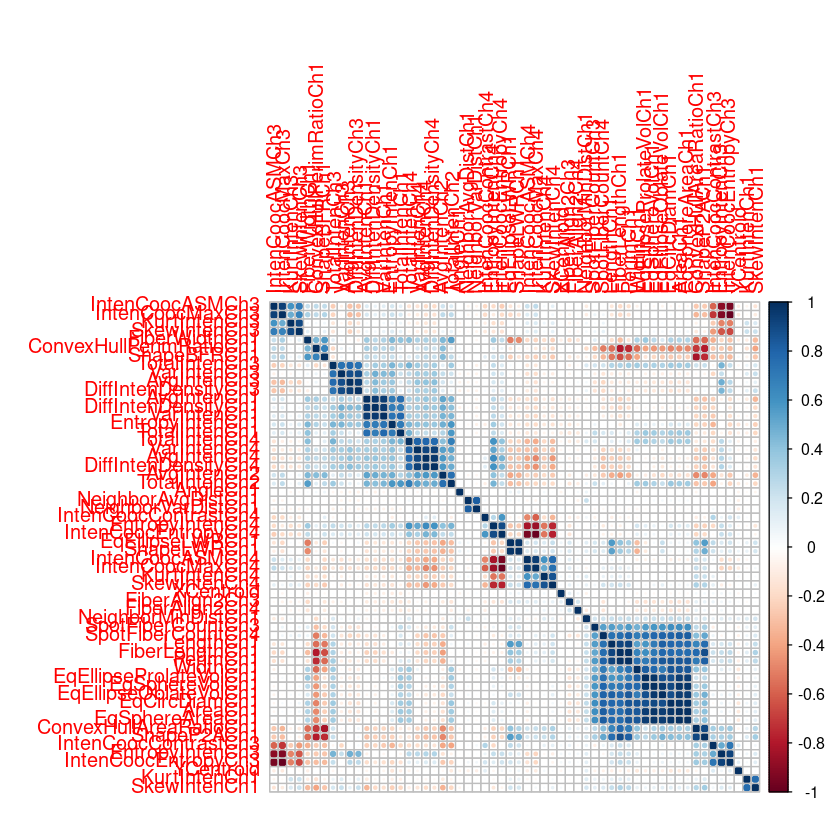

In [12]:
correlations = cor(segData)
dim(correlations)


library(corrplot)
corrplot(correlations, order = "hclust")

In [24]:
#To find highly correlated predictors with cutoff value 0.9
#returns the col numbers of variables which have high correlation values
highCorr = findCorrelation(correlations, cutoff = .90)

length(highCorr)
head(highCorr)

highCorr

#Delete all variables which have a high correlation
filteredSegData = segData[,-highCorr]

[1] 20

[1] 23 40 43 15 19  2

[1] 23 40 43 15 19  2 17  6 11 20  3  9 30 29 13 32 31 16  5 34

In [ ]:
str(filteredSegData)

cr.new=cor(filteredSegData)

#To make a correlation plot


# Transformation - standarization, scaling, normalization, ...

Normalization / Scaling (numeric transformations)
Independent variable, predictor, features

### Scaling
MinMaxScaler scales the data so that each feature is in the range [0, 1]. It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.


R function : 
scaled.x = scale(x,center=TRUE, scale=TRUE)


[1] 1

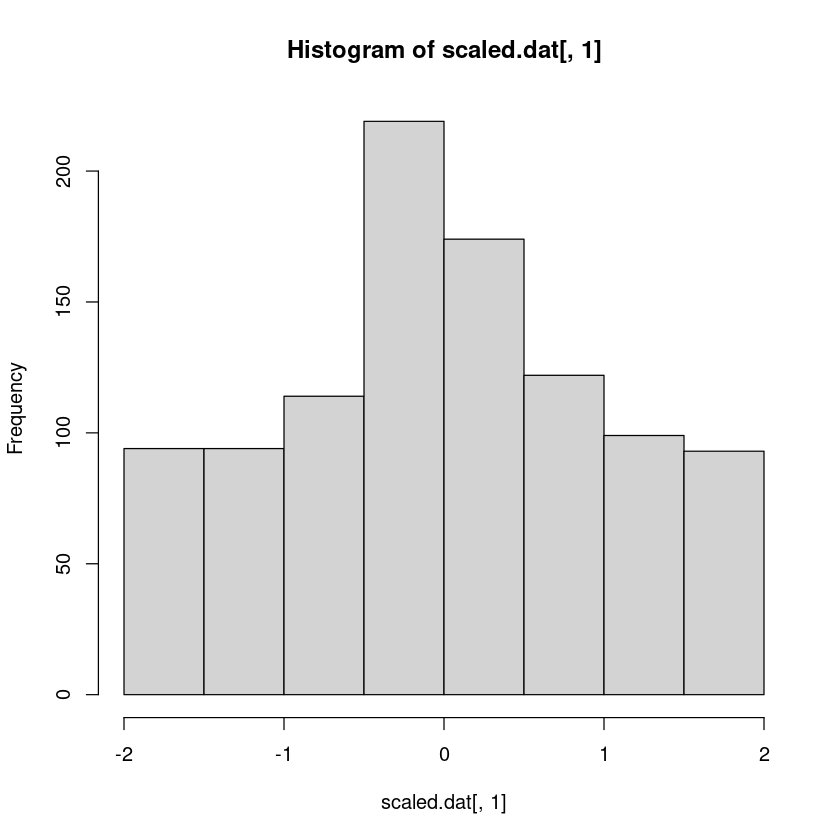

In [15]:
#Scaling all variable in data set "segData"

scaled.dat=scale(segData, center=TRUE, scale=TRUE)

#the data such that all variables are standarized.
hist(scaled.dat[,1])

var(scaled.dat[,1])

# Data Transformations for Multiple Predictors

• The focus of these transformations is to address outliers and
reduce the dimensionality of the data, both of which are critical
for improving the performance and interpretability of models.

• Transformations to Resolve Outliers
For models sensitive to outliers, the spatial sign transformation
can be used to reduce their impact by focusing on the direction of
the data instead of its magnitude.

• Data Reduction and Feature Extraction
Data reduction techniques are transformations that create a
smaller set of predictors, aiming to retain most of the information
from the original variables while reducing the overall data
complexity.

- for example :  The "spatial sign" transformation (Serneels et al., 2006) projects predictor
data onto the unit circle in p-dimensional space by dividing each data vector by its norm. Prior to this transformation, predictors need to be centered and
scaled. The two figures provided show the effect of this transformation 

In [16]:
library(caret)

In [17]:
data(mdrr)
plotSubset = data.frame(scale(mdrrDescr[, c("nC", "X4v")]))

str(plotSubset)

'data.frame':	528 obs. of  2 variables:
 $ nC : num  -0.691 -0.494 -0.691 -0.888 -0.494 ...
 $ X4v: num  0.0146 0.1084 0.239 -0.234 -0.0264 ...


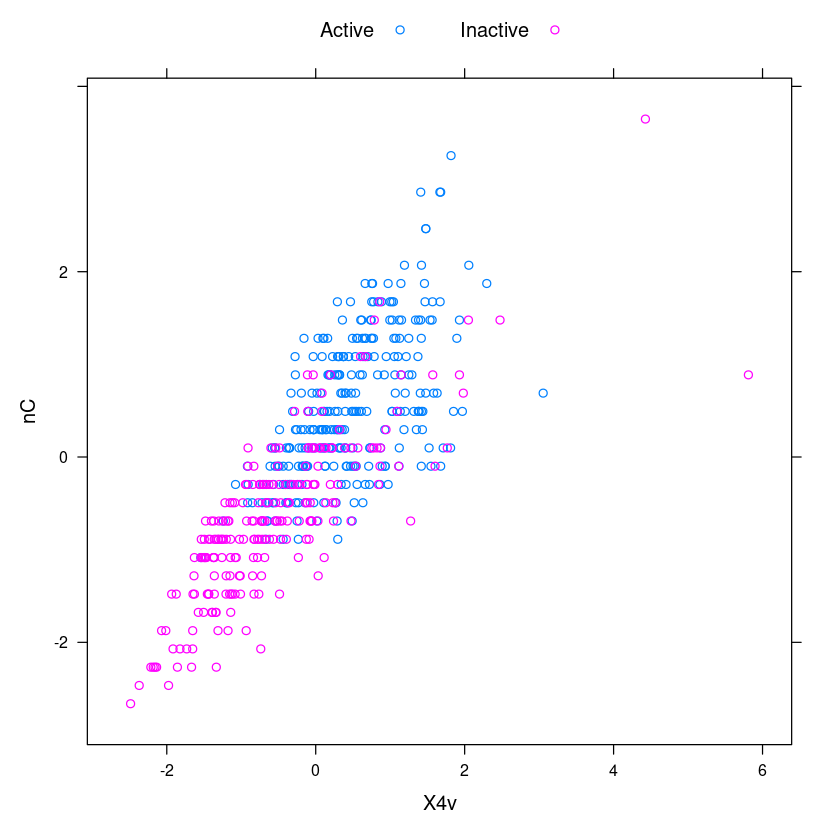

In [18]:
#plot the data

xyplot(nC ~ X4v,data = plotSubset,groups = mdrrClass,auto.key = list(columns = 2))

#There are two outliers

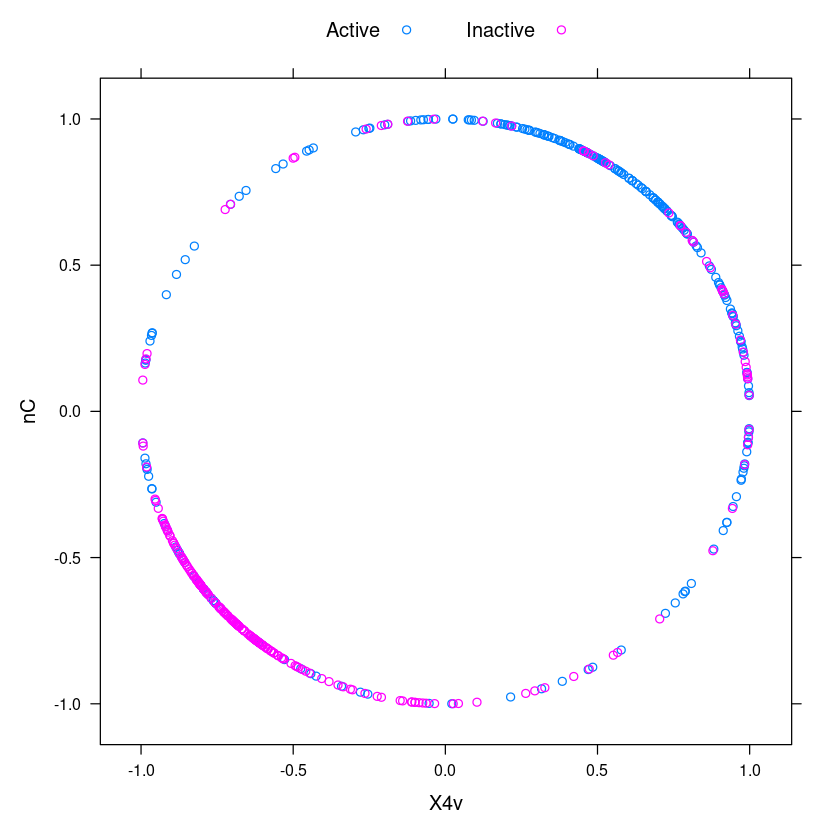

In [19]:
#special sign transformation 

#After the spatial sign:
transformed = spatialSign(plotSubset)
transformed = as.data.frame(transformed)
xyplot(nC ~ X4v, data = transformed, groups = mdrrClass,auto.key = list(columns = 2))

# Missing Values

• If the pattern of missing data is related to the outcome, it is known as "informative missingness." This type of missingness can introduce significant bias into the model, as the missing data itself provides valuable information about the outcome.

• In R, we can use the mice package (Multiple Imputation by Chained Equations) to perform both multiple imputation and the subsequent
analysis. The mice() function carries out the imputation using chained equations. Without delving too deeply into the details, chained equations are a variant of the Gibbs Sampler, an MCMC (Markov Chain
Monte Carlo) method. This approach iterates between estimating missing values and estimating parameters for the distribution of the variables, with both being conditional on the other variables. The number of imputations is controlled by the m argument, and the default
value is set to 5.

In [20]:
library(mice)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




In [21]:
lc = "../DASC5302/diamond_new.csv"
dat = read.csv(lc, header = TRUE)
head(dat)

,carat,cut,color,clarity,depth,table,price,x,y,z
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0.53,Good,D,SI2,63.9,55,1318,5.14,5.10,3.27
2,0.42,Premium,F,VS1,61.2,58,1103,4.86,4.82,2.96
3,0.34,Premium,E,VS1,59.9,58,1033,4.58,4.54,2.73
4,0.70,Very Good,D,VS1,62.8,59,3247,5.63,5.68,3.55
5,0.28,Very Good,E,VVS2,64.0,54,572,4.11,4.17,2.65
6,0.51,Premium,D,VS2,62.0,59,1807,5.12,5.08,3.16


In [22]:
set.seed(179)

#m controls the number of imputations
# 5: there will be 5 complete dataset

dat.imp = mice(dat,m = 5,method ='pmm')

#to access the third compelte data set
complete(dat.imp, 3)

#please report the imputed price for the 7th diamond of the third imputed data
#1120, when the seed is 179
#1622, when the seed is 3179


 iter imp variable
  1   1  price
  1   2  price
  1   3  price
  1   4  price
  1   5  price
  2   1  price
  2   2  price
  2   3  price
  2   4  price
  2   5  price
  3   1  price
  3   2  price
  3   3  price
  3   4  price
  3   5  price
  4   1  price
  4   2  price
  4   3  price
  4   4  price
  4   5  price
  5   1  price
  5   2  price
  5   3  price
  5   4  price
  5   5  price


Warning message:
“Number of logged events: 3”


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.53,Good,D,SI2,63.9,55.0,1318,5.14,5.10,3.27
0.42,Premium,F,VS1,61.2,58.0,1103,4.86,4.82,2.96
0.34,Premium,E,VS1,59.9,58.0,1033,4.58,4.54,2.73
0.70,Very Good,D,VS1,62.8,59.0,3247,5.63,5.68,3.55
0.28,Very Good,E,VVS2,64.0,54.0,572,4.11,4.17,2.65
0.51,Premium,D,VS2,62.0,59.0,1807,5.12,5.08,3.16
0.61,Premium,E,SI2,61.3,59.0,1698,5.48,5.39,3.33
0.34,Very Good,G,VS2,60.3,54.0,596,4.53,4.56,2.74
1.50,Fair,F,VVS2,64.7,53.0,16364,7.22,7.15,4.65


Package Caret knnImpute function:


In [23]:
library(caret) #include RANN package

install.packages("RANN")
library(RANN)

#Load the package if not
dat.model = preProcess(dat, "knnImpute")

#the data
imputed.pred = predict(dat.model, dat)

Warning message in install.packages("RANN"):
“'lib = "/opt/R/4.2.2/lib/R/library"' is not writable”


ERROR: Error in install.packages("RANN"): unable to install packages


# Dummy variables

A dummy variable, also known as an indicator, dichotomous, discrete, or
categorical variable, is a numeric value used to represent a categorical
variable, such as gender or race. They take on values of 0 or 1, where
each value indicates the presence or absence of a specific category.

In [ ]:
table(dat$color)

In [ ]:
library(tidyverse)

dat$dummy_Ecolor = ifelse(dat$color %in% c("E"), 1, 0)

dat.1=dat %>% mutate(color_D = ifelse(color == "D", 1, 0),
color_E = ifelse(color == "E", 1, 0),
color_F = ifelse(color == "F", 1, 0),
color_G = ifelse(color == "G", 1, 0),
color_H = ifelse(color == "H", 1, 0),
color_I = ifelse(color == "I", 1, 0),
color_J = ifelse(color == "J", 1, 0))

dat.1

In [ ]:
?scale

In [2]:
x = matrix(1:10, ncol = 2)
x

dim(x)
#for a column, the mean is zero after the scale function
centered.x = scale(x, scale = FALSE)
centered.x

#for a column, the variance is 1 after the scale function (the mean is zero and the variance is 1)
zscore.x = scale(x, scale = TRUE)
zscore.x

1,6
2,7
3,8
4,9
5,10


[1] 5 2

-2,-2
-1,-1
0,0
1,1
2,2


-1.2649111,-1.2649111
-0.6324555,-0.6324555
0.0000000,0.0000000
0.6324555,0.6324555
1.2649111,1.2649111
